# Morning Rush Hour in the Bedford Avenue Stop

Final Project by **Manolis Manoli**

## Introduction

The Bedford Avenue L train station in Williamsburg has approximately an average of 27,000 daily users (1) on any given weekday. This makes it the second most frequented train station in Brooklyn - all that with only one platform serving both the Manhattan bound train and those that take passangers deeper into Brooklyn.

It is notorious for its delays and huge crowds on the small platform waiting until they can finally squeeze into a train - after seeing multiples pass with only a few waiting passangers being able to squeeze into the already overcrowded trains.

In the morning, the overwhelming amount of passangers will travel into Manhattan with those traveling into Brooklyn not experiencing shortage in space. In the evening the trains back into Brooklyn will be overcrowded with those from Brooklyn into Manhattan being below capacity. We will therefore simplify our investigation and only focus on modeling the Bedford Avenue platform and passangers traveling into Manhattan. 

We want to see how the amount of people waiting varies throughout rush hour and how many trains operate at capacity.

## Assumptions

1) The L train has 8 cars with each car having 4 doors. We will model each of these 32 doors using a Normal Distribution. The mean and variance will depend on the time t and distributed N(mspace_t , vspace_t) where t are different time segments during the rush hour

2) According to the article "The Waiting Time Paradox, or, Why Is My Bus Always Late?" (2) the arrival time of trains is actually not Poisson distributed but rather normally distributed. This is due to the fact that arrival times of trains The trains arrive on average every 4 minutes a variance of 1.5 minutes - N(4,1.5).

3) We assume that at 7:30 there is no queue and any traveler will find space until that time 

4) The traveler arrive at the train station with poisson distribution Pois(Lambda_t) where t are different time segments during the rush hour

5) Travelers will move to doors where there is still room (in reality sometimes the doors at the end of the platform will have space with most people trying to get into the train in the center)

## Flow Chart

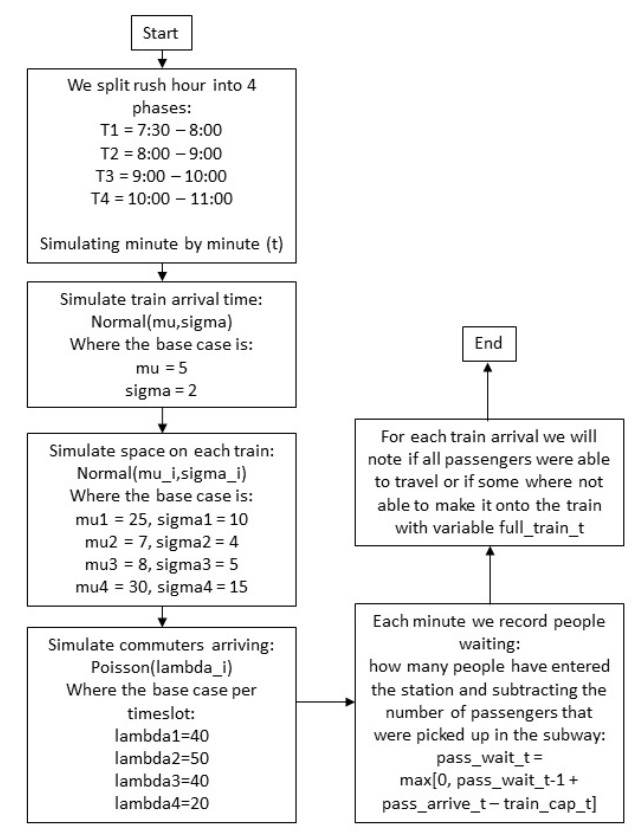

## Implementation

In [1]:
import pandas as pd
from modsim import *
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt    

# Configure Jupyter so figures appear in the notebook
%matplotlib inline

In [2]:
t_start = dt.datetime(1,1,1,7,30,0)
t_period1_start = t_start + dt.timedelta(0,60*(30))
t_period2_start = t_period1_start + dt.timedelta(0,60*(60))
t_period3_start = t_period2_start + dt.timedelta(0,60*(60))
t_end = t_period3_start + dt.timedelta(0,60*(60))

In [3]:
#rushhour is 3h30
num_minutes = 210

#passenager poisson
lamb1=40
lamb2=50
lamb3=40
lamb4=20

#train frequency
mu_train = 5
sigma_train = 2

#space per door
mu1=25
sigma1=10
mu2=7
sigma2=4
mu3=8
sigma3=5
mu4=30
sigma4=15

In [4]:
# creating empty rows with time stamp
def make_table(num_minutes):
    df = pd.DataFrame(columns=['time','pass_arrive','trainYN','train_cap','pass_wait','full_train'])
    for i in range(num_minutes+1):
        new_time = t_start + dt.timedelta(0,60*(i))
        #new_row = {'time':new_time.strftime('%H:%M')}
        new_row = {'time':new_time}
        df = df.append(new_row, ignore_index=True)

    #make NAs into zeros
    df['trainYN'] = df['trainYN'].fillna(0)
    df['train_cap'] = df['train_cap'].fillna(0)
    
    return df



In [5]:
df = make_table(210)
df

,time,pass_arrive,trainYN,train_cap,pass_wait,full_train,max_wait
0,0001-01-01 07:30:00,NaN,0,0,NaN,NaN,NaN
1,0001-01-01 07:31:00,NaN,0,0,NaN,NaN,NaN
2,0001-01-01 07:32:00,NaN,0,0,NaN,NaN,NaN
3,0001-01-01 07:33:00,NaN,0,0,NaN,NaN,NaN
4,0001-01-01 07:34:00,NaN,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
206,0001-01-01 10:56:00,NaN,0,0,NaN,NaN,NaN
207,0001-01-01 10:57:00,NaN,0,0,NaN,NaN,NaN
208,0001-01-01 10:58:00,NaN,0,0,NaN,NaN,NaN
209,0001-01-01 10:59:00,NaN,0,0,NaN,NaN,NaN


In [6]:
# simulating train arrival (time between train arrival is normal distr)

def sim_train_arrival(data_frame,mu_train,sigma_train):
    
    df=data_frame
    
    minute = 0
    
    while (minute < len(df)):
        train_interv = round(np.random.normal(mu_train, sigma_train, 1))
        minute = minute + train_interv
        if (minute < len(df)):
            df.trainYN[minute] = 1
            
    return df

In [7]:
df = sim_train_arrival(df,mu_train,sigma_train)
df

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,time,pass_arrive,trainYN,train_cap,pass_wait,full_train,max_wait
0,0001-01-01 07:30:00,NaN,0,0,NaN,NaN,NaN
1,0001-01-01 07:31:00,NaN,0,0,NaN,NaN,NaN
2,0001-01-01 07:32:00,NaN,0,0,NaN,NaN,NaN
3,0001-01-01 07:33:00,NaN,1,0,NaN,NaN,NaN
4,0001-01-01 07:34:00,NaN,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
206,0001-01-01 10:56:00,NaN,0,0,NaN,NaN,NaN
207,0001-01-01 10:57:00,NaN,0,0,NaN,NaN,NaN
208,0001-01-01 10:58:00,NaN,1,0,NaN,NaN,NaN
209,0001-01-01 10:59:00,NaN,0,0,NaN,NaN,NaN


In [8]:
def sim_train_capacity(df,mu1,sigma1,mu2,sigma2,mu3,sigma3,mu4,sigma4):
    for i in range(len(df)):
        if(df.trainYN[i]==1):           
            if (df.time[i] < t_period1_start):
                mu=mu1
                sigma=sigma1
            elif (df.time[i]<t_period2_start):
                mu=mu2
                sigma=sigma2
            elif (df.time[i]<t_period3_start):
                mu=mu3
                sigma=sigma3
            else:
                mu=mu4
                sigma=sigma4
            df.train_cap[i]= sum(np.random.normal(mu, sigma, 32))
    return df


In [9]:
df = sim_train_capacity(df,mu1,sigma1,mu2,sigma2,mu3,sigma3,mu4,sigma4)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [10]:
df

,time,pass_arrive,trainYN,train_cap,pass_wait,full_train,max_wait
0,0001-01-01 07:30:00,NaN,0,0,NaN,NaN,NaN
1,0001-01-01 07:31:00,NaN,0,0,NaN,NaN,NaN
2,0001-01-01 07:32:00,NaN,0,0,NaN,NaN,NaN
3,0001-01-01 07:33:00,NaN,1,730,NaN,NaN,NaN
4,0001-01-01 07:34:00,NaN,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
206,0001-01-01 10:56:00,NaN,0,0,NaN,NaN,NaN
207,0001-01-01 10:57:00,NaN,0,0,NaN,NaN,NaN
208,0001-01-01 10:58:00,NaN,1,765,NaN,NaN,NaN
209,0001-01-01 10:59:00,NaN,0,0,NaN,NaN,NaN


In [11]:
def sim_passangers(df,lamb1,lamb2,lamb3,lamb4):

    #simulating passenger arival  

    for i in range(len(df)):
        if (df.time[i] < t_period1_start):
            lamb = lamb1
        elif (df.time[i]<t_period2_start):
            lamb = lamb2
        elif (df.time[i]<t_period3_start):
            lamb = lamb3
        else:
            lamb = lamb4

        df.pass_arrive[i]= np.random.poisson(lamb,1)
        
    return df

In [12]:
df = sim_passangers(df,lamb1,lamb2,lamb3,lamb4)
df

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,time,pass_arrive,trainYN,train_cap,pass_wait,full_train,max_wait
0,0001-01-01 07:30:00,[47],0,0,NaN,NaN,NaN
1,0001-01-01 07:31:00,[41],0,0,NaN,NaN,NaN
2,0001-01-01 07:32:00,[42],0,0,NaN,NaN,NaN
3,0001-01-01 07:33:00,[51],1,730,NaN,NaN,NaN
4,0001-01-01 07:34:00,[43],0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
206,0001-01-01 10:56:00,[24],0,0,NaN,NaN,NaN
207,0001-01-01 10:57:00,[13],0,0,NaN,NaN,NaN
208,0001-01-01 10:58:00,[15],1,765,NaN,NaN,NaN
209,0001-01-01 10:59:00,[20],0,0,NaN,NaN,NaN


In [13]:
def add_waittime_trainfull(df):
    for i in range(len(df)):
        if(i==0):
            df.pass_wait[i]=max([0,df.pass_arrive[i]-df.train_cap[i]])
        else:    
            df.pass_wait[i]=max([0,df.pass_wait[i-1]+df.pass_arrive[i]-df.train_cap[i]])
            
    for i in range(len(df)):
        if(df.trainYN[i]==1):
            if(df.pass_wait[i]==0):
                df.full_train[i]=0
            else:
                df.full_train[i]=1
   
    return df


In [15]:
add_waittime_trainfull(df)
df


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWi

,time,pass_arrive,trainYN,train_cap,pass_wait,full_train,max_wait
0,0001-01-01 07:30:00,[39],0,0,[39],NaN,NaN
1,0001-01-01 07:31:00,[32],0,0,[71],NaN,NaN
2,0001-01-01 07:32:00,[42],0,0,[113],NaN,NaN
3,0001-01-01 07:33:00,[43],1,757,0,0,NaN
4,0001-01-01 07:34:00,[39],0,0,[39],NaN,NaN
...,...,...,...,...,...,...,...
206,0001-01-01 10:56:00,[19],1,990,0,0,NaN
207,0001-01-01 10:57:00,[26],0,0,[26],NaN,NaN
208,0001-01-01 10:58:00,[20],0,0,[46],NaN,NaN
209,0001-01-01 10:59:00,[25],0,0,[71],NaN,NaN


In [14]:
sum(df.full_train)

0

In [15]:
def run_full_sim(num_minutes,mu_train,sigma_train,mu1,sigma1,mu2,sigma2,mu3,sigma3,mu4,sigma4,lamb1,lamb2,lamb3,lamb4):
    df = make_table(num_minutes)
    df = sim_train_arrival(df,mu_train,sigma_train)
    df = sim_train_capacity(df,mu1,sigma1,mu2,sigma2,mu3,sigma3,mu4,sigma4)
    df = sim_passangers(df,lamb1,lamb2,lamb3,lamb4)
    df = add_waittime_trainfull(df)
    packed_trains = sum(df.full_train)
    return df

In [17]:
df2=run_full_sim(num_minutes,mu_train,sigma_train,mu1,sigma1,mu2,sigma2,mu3,sigma3,mu4,sigma4,lamb1,lamb2,lamb3,lamb4)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramDat

In [20]:
df2

,time,pass_arrive,trainYN,train_cap,pass_wait,full_train,max_wait
0,0001-01-01 07:30:00,[44],0,0,[44],NaN,NaN
1,0001-01-01 07:31:00,[43],0,0,[87],NaN,NaN
2,0001-01-01 07:32:00,[33],0,0,[120],NaN,NaN
3,0001-01-01 07:33:00,[50],0,0,[170],NaN,NaN
4,0001-01-01 07:34:00,[28],1,789,0,0,NaN
...,...,...,...,...,...,...,...
206,0001-01-01 10:56:00,[22],0,0,[41],NaN,NaN
207,0001-01-01 10:57:00,[18],1,956,0,0,NaN
208,0001-01-01 10:58:00,[19],0,0,[19],NaN,NaN
209,0001-01-01 10:59:00,[22],0,0,[41],NaN,NaN


In [19]:
sum(df2.train_cap)

21198

In [21]:
sum(df2.full_train)

17

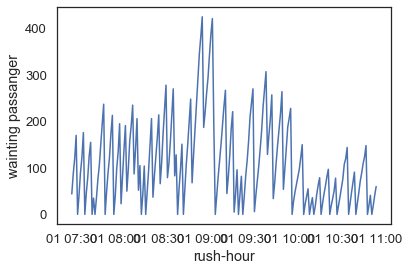

In [22]:
plt.plot(df2.time,df2.pass_wait)
plt.ylabel('wainting passanger')
plt.xlabel('rush-hour')
plt.show()

## Itteration & Stressing

In [123]:
sweep = SweepSeries()
for run in range(100):
    df_sweep = run_full_sim(num_minutes,mu_train,sigma_train,mu1,sigma1,mu2,
                            sigma2,mu3,sigma3,mu4,sigma4,lamb1,lamb2,lamb3,lamb4)
    sweep[run]=max(df_sweep.pass_wait)[0]
sweep

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramDat

AssertionError: <class 'pandas.core.series.Series'>

,values
0,405
1,901
2,1013
3,1066
4,356
...,...
95,629
96,716
97,558
98,419


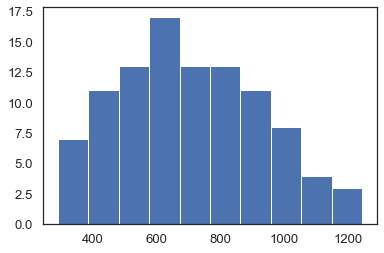

In [136]:
plt.hist(sweep.values, bins = 10)
plt.show()

In [137]:
mu_train2=6
sweep2 = SweepSeries()
for run in range(100):
    df_sweep = run_full_sim(num_minutes,mu_train2,sigma_train,mu1,sigma1,mu2,sigma2,mu3,sigma3,mu4,sigma4,lamb1,lamb2,lamb3,lamb4)
    sweep2[run]=max(df_sweep.pass_wait)[0]
sweep2

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramDat

AssertionError: <class 'pandas.core.series.Series'>

,values
0,994
1,846
2,1507
3,1431
4,1292
...,...
95,451
96,1208
97,1417
98,843


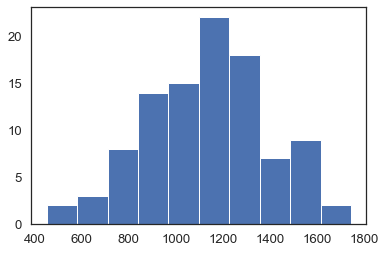

In [138]:
plt.hist(sweep2.values, bins = 10)
plt.show()

## Validation & Verification

We can see that in the line graph fact between 8:30 and 10:00 it is very likely to have a train pass by before being able to enter the train which is in line with the real world 

## Conclusion

## Citations

(1) http://web.mta.info/nyct/facts/ridership/ridership_sub.htm  
(2) http://jakevdp.github.io/blog/2018/09/13/waiting-time-paradox/